In [152]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import sys
import time
from IPython.display import clear_output
import sys

import tensorflow as tf

In [217]:
snake_board = np.zeros([20,20])

In [218]:
food_pos = np.random.randint(20), np.random.randint(20)

In [219]:
food_pos

(17, 5)

In [220]:
snake_board[food_pos] = 10

In [221]:
score = 0

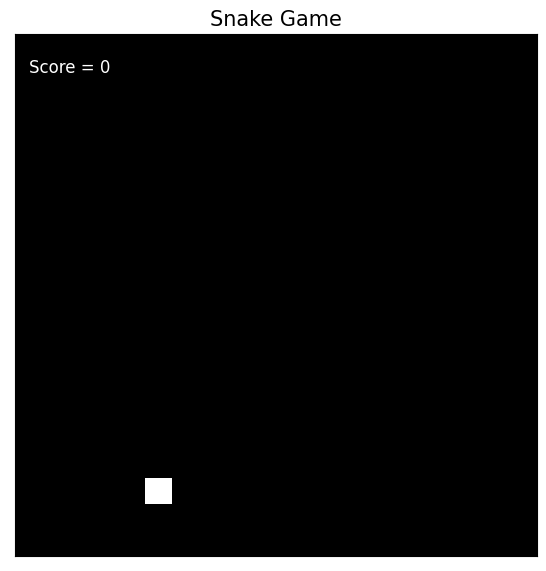

In [222]:
plt.figure(figsize=(6,6))
plt.imshow(snake_board, cmap='gray')
plt.title('Snake Game', fontsize = 15)
plt.text(0.04, 1, 'Score = {:.0f}'.format(score), color='w', fontsize = 12)
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [82]:
snake = (
    [int((snake_board.shape[0]/2) + 2), int(snake_board.shape[1]/2)],
    [int((snake_board.shape[0]/2) + 1), int(snake_board.shape[1]/2)],
    [int((snake_board.shape[0]/2) + 0), int(snake_board.shape[1]/2)],
    [int((snake_board.shape[0]/2) - 1), int(snake_board.shape[1]/2)]
)

In [83]:
for i in snake:
    snake_board[tuple(i)] = 5

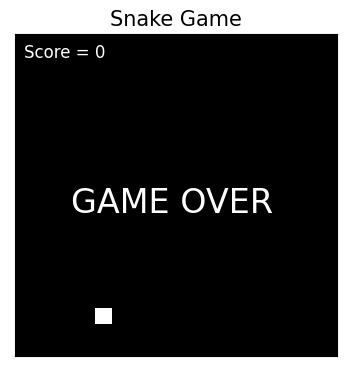

In [228]:
plt.figure(figsize=(4,4))
plt.imshow(snake_board, cmap='gray')
plt.title('Snake Game', fontsize = 15)
plt.text(0.04, 1, 'Score = {:.0f}'.format(score), color='w', fontsize = 12)
plt.text(3, 10, 'GAME OVER', color='w', fontsize = 24, va='center')
plt.tight_layout()
plt.xticks([])
plt.yticks([])
plt.show()

In [114]:
def get_acceptable_moves(mode):
    
    up = 0
    right = 1
    down = 2
    left = 3
    
    
    if mode == 'vertical_up':
        return [up, right, left]
    
    if mode == 'vertical_down':
        return [down, right, left]
    
    if mode == 'horizontel_left':
        return [down, up, left]
    
    if mode == 'horizontel_right':
        return [up, down, right]

In [184]:
def make_move(step, snake):
    up = 0
    right = 1
    down = 2
    left = 3
    
        
    if step == up:
        for i in range(len(snake)):
            if i == 0:
                prior = snake[i].copy()
                snake[i][0] += 1
                continue
            
            tmp = snake[i].copy()
            snake[i][0] = prior[0]
            snake[i][1] = prior[1]
            prior = tmp         
            
        snake_mode = 'vertical_up'
            
    if step == right:
        for i in range(len(snake)):
            if i == 0:
                prior = snake[i].copy()
                snake[i][1] += 1
                continue
            
            tmp = snake[i].copy()
            snake[i][0] = prior[0]
            snake[i][1] = prior[1]
            prior = tmp     
            
        snake_mode = 'horizontel_right'
        
    if step == left:
        for i in range(len(snake)):
            if i == 0:
                prior = snake[i].copy()
                snake[0][1] -= 1
                continue
            
            tmp = snake[i].copy()
            snake[i][0] = prior[0]
            snake[i][1] = prior[1]
            prior = tmp     
                
        snake_mode = 'horizontel_left'
                
    if step == down:
        for i in range(len(snake)):
            if i == 0:
                prior = snake[i].copy()
                snake[i][0] -= 1
                continue
            
            tmp = snake[i].copy()
            snake[i][0] = prior[0]
            snake[i][1] = prior[1]
            prior = tmp     
        
        snake_mode = 'vertical_down'
            
    return snake, snake_mode

In [243]:
def check_snake_alive(snake, dims):
    
    if snake[0][0] >= dims[0] - 1 or snake[0][0] <= 0:
        return False
    
    if snake[0][1] >= dims[1] - 1 or snake[0][1] <= 0:
        return False
    
    if snake[0] in snake[1:]:
        return False
    
    return True

In [173]:
def update_board(snake, snake_board):
    snake_board[snake_board == 0.5] = 0
    snake_board[snake] == 0.5
    return snake_board

In [250]:
def get_score(snake, score, fruit_pos):
    if snake[0] == [fruit_pos]:
        score += 10
        fruit_spawn = False

        snake_difference = snake[-1][0] - snake[-1-1][0], snake[-1][1] - snake[-1-1][1]

        snake.append([snake[-1][0] + snake_difference[0], snake[-1][1] + snake_difference[1]])

    else: 
        fruit_spawn = True
    
    return score, fruit_spawn

In [236]:
def update_board(snake, snake_board, fruit_pos, score, game_over):
    
    snake_board[snake_board == 5] = 0
    snake_board[snake_board == 10] = 0
    
    
    # if game_over:
    for i in snake:
        snake_board[tuple(i)] = 5
    
    snake_board[fruit_pos] = 10
    
    plt.figure(figsize=(4,4))
    plt.imshow(snake_board, cmap='gray')
    plt.title('Snake Game', fontsize = 15)
    plt.text(0.04, 1.5, 'Score = {:.0f}'.format(score), color='w', fontsize = 12)
    if game_over:
        plt.text(3, 10, 'GAME OVER', color='w', fontsize = 24, va='center')
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [176]:
def init_snake():
    snake = (
        [int((snake_board.shape[0]/2)), int(snake_board.shape[1]/2)],
        [int((snake_board.shape[0]/2) - 1), int(snake_board.shape[1]/2)],
        [int((snake_board.shape[0]/2) - 2), int(snake_board.shape[1]/2)],
        [int((snake_board.shape[0]/2) - 3), int(snake_board.shape[1]/2)]
    )
    
    return snake

In [259]:
def init_fruit(board_dims):
    return np.random.randint(board_dims[0]), np.random.randint(board_dims[1])

Move 9


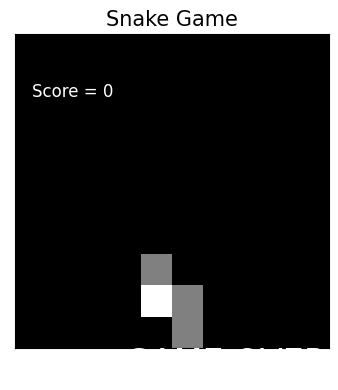

In [264]:
num_steps = 500
score = 0
fruit_spawn = False
snake_alive = True
game_over = False
snake_mode = 'vertical_up'
move_tmp = 'bad'
snake_board = np.zeros([10,10])
snake = init_snake()
fruit_pos = init_fruit(snake_board.shape)

for i in range(num_steps):
    clear_output(wait = True)
    print(f'Move {i}')
    
    acceptable_moves = get_acceptable_moves(snake_mode)
    
    while move_tmp == 'bad':
        step = np.random.randint(0,4)
        if step in acceptable_moves:
            move_tmp = 'good'
    move_tmp = 'bad'
        
    snake, snake_mode = make_move(step, snake)
    
    snake_alive = check_snake_alive(snake, snake_board.shape)
    
    if not snake_alive:
        game_over = True
        
    score, fruit_spawn = get_score(snake, score, fruit_pos)
        
    if not fruit_spawn:
        fruit_pos = spawn_fruit(snake)
        fruit_spawn = True
    
    update_board(snake, snake_board, fruit_pos, score, game_over)
    
    if game_over:
        break
    
    time.sleep(0.1)